# 1. Les packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 2. Importation des données

In [2]:
data_dispo = pd.read_csv(r"C:\Users\diarr\Downloads\DAN-P4-FAO\dispo_alimentaire.csv")
data_sous_nutrition = pd.read_csv(r"C:\Users\diarr\Downloads\DAN-P4-FAO\sous_nutrition.csv")
data_population = pd.read_csv(r"C:\Users\diarr\Downloads\DAN-P4-FAO\population.csv")
data_aide = pd.read_csv(r"C:\Users\diarr\Downloads\DAN-P4-FAO\aide_alimentaire.csv")

## 2.1. Exploration et analyse des données

* Dans cette étape nous allons explorer une par une toutes les DataFrames pour en extraire des informations , revoir la structure des données ainsi faire une courte analyse par la suite.

### 2.1.1 DataFrame "disponibilité alimentaire"

In [3]:
# Observation des 5 premiers lignes de l'échantillon
data_dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Forme du jeu de donnés
data_dispo.shape

(15605, 18)

In [5]:
  #Typages de données
info = data_dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [6]:
# Vérification des doublons
data_dispo[data_dispo.duplicated()]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock


In [7]:
  # Pourcentages des valeurs nulls
#pourcentage_valeur_null = round(data_dispo.isnull().sum()/data_dispo.isnull().count()*100,2).sort_values(ascending=False)
pourcentage_valeur_null = round((data_dispo.isnull().sum()/data_dispo.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Semences                                                         86.60
Traitement                                                       85.31
Aliments pour animaux                                            82.57
Pertes                                                           72.59
Autres Utilisations                                              64.78
Variation de stock                                               56.58
Production                                                       41.17
Disponibilité de protéines en quantité (g/personne/jour)         25.91
Disponibilité de matière grasse en quantité (g/personne/jour)    24.42
Exportations - Quantité                                          21.65
Disponibilité alimentaire en quantité (kg/personne/an)           10.19
Nourriture                                                       10.19
Disponibilité alimentaire (Kcal/personne/jour)                    8.74
Importations - Quantité                                           4.83
Dispon

In [8]:
  #Statistiques descriptives
statistique = data_dispo.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Aliments pour animaux,2720.0,479.501838,4240.119637,0.00,0.00,4.00,74.00,150000.00
Autres Utilisations,5496.0,157.391376,5076.785816,0.00,0.00,0.00,4.00,347309.00
Disponibilité alimentaire (Kcal/personne/jour),14241.0,34.789832,107.287655,-21.00,0.00,4.00,21.00,1711.00
Disponibilité alimentaire en quantité (kg/personne/an),14015.0,8.719368,24.618223,-1.93,0.06,0.83,5.19,430.76
Disponibilité de matière grasse en quantité (g/personne/jour),11794.0,1.283111,3.680399,-0.03,0.01,0.08,0.63,60.76
Disponibilité de protéines en quantité (g/personne/jour),11561.0,1.223608,3.598686,-0.37,0.01,0.10,0.66,54.97
Disponibilité intérieure,15382.0,640.293460,9067.267153,-3430.00,0.00,7.00,76.75,739267.00
Exportations - Quantité,12226.0,110.596925,1053.318990,-41.00,0.00,0.00,9.00,42797.00
Importations - Quantité,14852.0,87.264543,717.372714,-201.00,0.00,2.00,18.00,63381.00
Nourriture,14015.0,347.931359,4475.704458,-246.00,0.00,5.00,52.00,426850.00


On voit qu'on a pas mal de valeurs abérrantes dans certaines de nos colonnes et pour plus les visualiser , on peut faire un boxplot avec ces colonnes. 

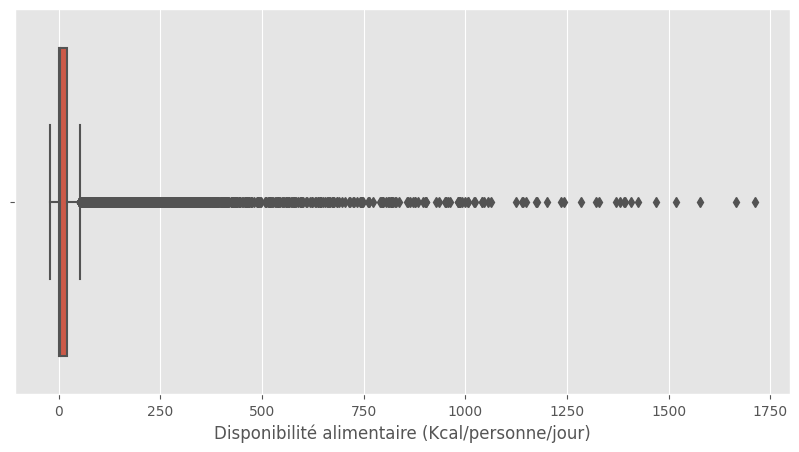

In [9]:
# visualisation des valeurs abérrantes avec un boxplot
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 10})
plt.figure(figsize=(10,5))
sns.boxplot(x="Disponibilité alimentaire (Kcal/personne/jour)", data=data_dispo, showfliers = True)
plt.show()

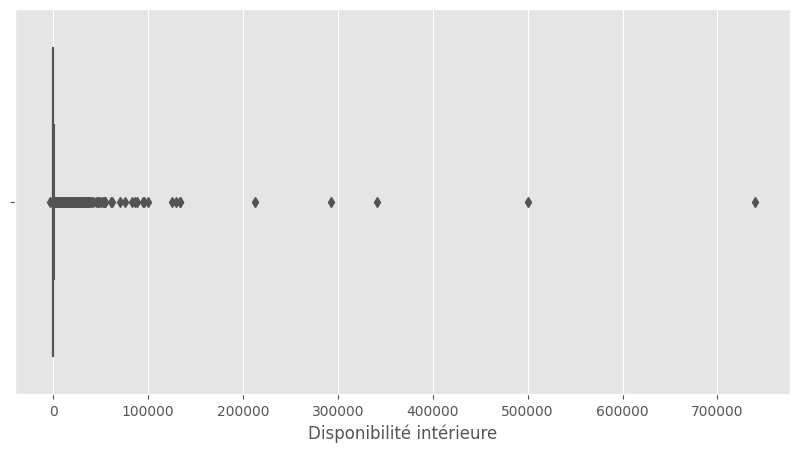

In [10]:
# visualisation des valeurs abérrantes avec un boxplot
plt.style.use('ggplot')
plt.rcParams.update({ "font.size" : 10})
plt.figure(figsize=(10,5))
sns.boxplot(x="Disponibilité intérieure", data=data_dispo, showfliers = True)
plt.show()

In [11]:
# pour trouver les éléments unique de la colonne
data_dispo["Zone"].nunique()

174

In [12]:
data_dispo["Zone"].value_counts()

Inde                                          97
Japon                                         97
République-Unie de Tanzanie                   96
Brésil                                        96
Indonésie                                     96
                                              ..
Timor-Leste                                   61
République populaire démocratique de Corée    61
Afghanistan                                   60
Turkménistan                                  57
Lesotho                                       53
Name: Zone, Length: 174, dtype: int64

#### 2.1.1.1 Traiter les valeurs manquantes

* On voit qu'on a pas mal de valeurs manquantes dans ce dataframe , dans ce cas on va utiliser la fonction fillna pour remplacer les valeurs manquantes par 0 parceque si on les supprime ça nous fera perdre beaucoup d'information pour répondre aux différentes demandes de Marc.

In [13]:
# remplacer les valeurs manquantes
data_dispo = data_dispo.fillna(0) 

* Après avoir remplacer les valeurs manquantes nous allons maintenant revérifier à nouveau si notre fonction a été bien appliquée sur les différentes colonnes

In [14]:
  # Pourcentages des valeurs nulls aprés la fonction fillna
pourcentage_valeur_null = round((data_dispo.isnull().sum()/data_dispo.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Zone                                                             0.0
Produit                                                          0.0
Traitement                                                       0.0
Semences                                                         0.0
Production                                                       0.0
Pertes                                                           0.0
Nourriture                                                       0.0
Importations - Quantité                                          0.0
Exportations - Quantité                                          0.0
Disponibilité intérieure                                         0.0
Disponibilité de protéines en quantité (g/personne/jour)         0.0
Disponibilité de matière grasse en quantité (g/personne/jour)    0.0
Disponibilité alimentaire en quantité (kg/personne/an)           0.0
Disponibilité alimentaire (Kcal/personne/jour)                   0.0
Autres Utilisations               

In [15]:
# Observation des 5 premiers lignes de l'échantillon après remplacement des valeurs manquantes
data_dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


* D'après la lexique des données 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
* Dans ce cas on va multiplier ces colonnes par 1000000 qui correspond pour un millier de tonnes = 1000000kg.
* Nous creer une liste et utiliser une boucle for afin d'appliquer le calcul aux différentes colonnes

In [16]:
# Utilisation d'un boucle for pour convertir les colonnes situés dans la liste crée
colonnes_tonnes_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_tonnes_tokg:
    data_dispo[elt] = data_dispo[elt]*1000000
    

In [17]:
  #Typages de données
info = data_dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [18]:
# Observation des 5 premiers lignes de l'échantillon après remplacement des valeurs manquantes
data_dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


### 2.1.2 DataFrame "sous nutrition"

In [19]:
# Observation des 5 premiers lignes de l'échantillon
data_sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [20]:
# Forme du jeu de donnés (EdStatsCountrySeries)
data_sous_nutrition.shape

(1218, 3)

In [21]:
# Vérification des doublons
data_sous_nutrition[data_sous_nutrition.duplicated()]

,Zone,Année,Valeur


In [22]:
  # Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_sous_nutrition.isnull().sum()/data_sous_nutrition.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Valeur    48.77
Zone       0.00
Année      0.00
dtype: float64

In [23]:
  #Statistiques descriptives
statistique = data_sous_nutrition.describe().T
statistique

,count,unique,top,freq
Zone,1218,203,Afghanistan,6
Année,1218,6,2012-2014,203
Valeur,624,139,<0.1,120


In [24]:
  #Typages de données
info = data_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


* On voit que les deux colonnes "Années" et "Valeur" sont au mauvais format, nous allons essayer de résoudre cette incidence
* D'après les recherches précédents de Julien la colonne "Années" correspond par ex : pour
  l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3
  années, on peut le résumer en 2013.
* Dans ce cas nous allons convertir ces colonnes pour changer la structure de la colonne

In [25]:
# pour trouver les éléments unique de la colonne
data_sous_nutrition['Valeur'].unique()

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [26]:
# changer la valeur de la colonne
#data_sous_nutrition['Valeur'] = data_sous_nutrition['Valeur'].replace('<0.1','0.1')

In [27]:
# Changer le type
data_sous_nutrition['Valeur'] = pd.to_numeric(data_sous_nutrition['Valeur'], errors='coerce')

* Maintenant nous allons changer le type qui doit être un "int" au lieu d'un "object" pour la colonne "Année" avec la fonction "replace" de python

In [28]:
# changer les valeurs de la colonne
data_sous_nutrition["Année"] = data_sous_nutrition["Année"].replace(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018','2017-2019'],
                                                                    ['2013','2014','2015','2016','2017','2018'])

In [29]:
# pour trouver les éléments unique de la colonne
data_sous_nutrition["Année"].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018'], dtype=object)

In [30]:
# Changer le type
data_sous_nutrition["Année"] = pd.to_numeric(data_sous_nutrition["Année"], errors='coerce')

In [31]:
  #Typages de données après changement
info = data_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   int64  
 2   Valeur  504 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


In [32]:
data_sous_nutrition["Zone"].value_counts()

Afghanistan           6
Panama                6
Nioué                 6
Norvège               6
Nouvelle-Calédonie    6
                     ..
Grèce                 6
Grenade               6
Groenland             6
Guatemala             6
Zimbabwe              6
Name: Zone, Length: 203, dtype: int64

In [33]:
data_sous_nutrition["Zone"].nunique()

203

* D'après la lexique des données des personnes en sous nutrition(sous alimentation) est exprimé en millions d’habitants, on va multiplier par 1000000 la colonne.

In [34]:
# dataframe sous nutrition
data_sous_nutrition["Valeur"] = data_sous_nutrition["Valeur"]*1000000
data_sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [35]:
  #Typages de données
info = data_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   int64  
 2   Valeur  504 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


In [36]:
# renommer la colonne
data_sous_nutrition = data_sous_nutrition.rename(columns = {"Valeur": "Personne en sous-alimentation"})

#### 2.1.2.1 Traiter les valeurs manquantes

In [37]:
# remplacer les valeurs maquantes du dataframe sous nutrition
data_sous_nutrition = data_sous_nutrition.fillna(0)  

data_sous_nutrition.head(5)

,Zone,Année,Personne en sous-alimentation
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


* Après avoir remplacer les valeurs manquantes nous allons maintenant revérifier à nouveau si notre fonction a été bien appliquée sur les différentes colonnes

In [38]:
  # Pourcentages des valeurs nulls aprés la fonction fillna
pourcentage_valeur_null = round((data_sous_nutrition.isnull().sum()/data_sous_nutrition.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Zone                             0.0
Année                            0.0
Personne en sous-alimentation    0.0
dtype: float64

### 2.1.3 DataFrame "Population"

In [39]:
# Observation des 5 premiers lignes de l'échantillon
data_population.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [40]:
# Forme du jeu de donnés 
data_population.shape

(1416, 3)

In [41]:
  #Typages de données
info = data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [42]:
# Vérification des doublons
data_population[data_population.duplicated()]

,Zone,Année,Valeur


In [43]:
 # total_valeur_null
total_valeur_null = data_population.isnull().sum().sort_values(ascending=False)
total_valeur_null

Zone      0
Année     0
Valeur    0
dtype: int64

In [44]:
  # Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_population.isnull().sum()/data_population.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Zone      0.0
Année     0.0
Valeur    0.0
dtype: float64

In [45]:
  #Statistiques descriptives
statistique = data_population.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Année,1416.0,2015.500000,1.708428,2013.000,2014.000,2015.50,2017.00000,2018.000
Valeur,1416.0,31447.929428,130081.182581,0.793,378.341,5126.48,19306.66275,1427647.786


In [46]:
data_population = data_population.rename(columns = {"Valeur": "Nbre habitant"})
data_population.head(5)

,Zone,Année,Nbre habitant
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [47]:
data_population["Zone"].nunique()

236

In [48]:
data_population["Zone"].value_counts()

Afghanistan           6
Palestine             6
Nicaragua             6
Niger                 6
Nigéria               6
                     ..
Guinée                6
Guinée équatoriale    6
Guinée-Bissau         6
Guyana                6
Zimbabwe              6
Name: Zone, Length: 236, dtype: int64

* D'après la lexique des données la population du pays, exprimée en milliers d’habitants, dans ce cas on doit multiplier par 1000 toute la colonne "Nbre habitant" pas 1000.


In [49]:
data_population["Nbre habitant"] = data_population["Nbre habitant"]*1000

* On voit qu'on a pour ce DataFrame les bons formats pour le type de données des différentes colonnes, l'absence de valeurs manquantes 

In [50]:
data_population.head(5)

,Zone,Année,Nbre habitant
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


### 2.1.4 DataFrame "Aide alimentaire"

In [51]:
# Observation des 5 premiers lignes de l'échantillon
data_aide.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [52]:
# Forme du jeu de donnés 
data_aide.shape

(1475, 4)

In [53]:
  #Typages de données
info = data_aide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [54]:
# Vérification des doublons
data_aide[data_aide.duplicated()]

,Pays bénéficiaire,Année,Produit,Valeur


In [55]:
 # total_valeur_null
total_valeur_null = data_aide.isnull().sum().sort_values(ascending=False)
total_valeur_null

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [56]:
  # Pourcentages des valeurs nulls
pourcentage_valeur_null = round((data_aide.isnull().sum()/data_aide.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Pays bénéficiaire    0.0
Année                0.0
Produit              0.0
Valeur               0.0
dtype: float64

In [57]:
  #Statistiques descriptives
statistique = data_aide.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Année,1475.0,2014.054237,0.946916,2013.0,2013.0,2014.0,2015.0,2016.0
Valeur,1475.0,7481.966780,23339.531424,0.0,287.5,1178.0,4334.5,265013.0


In [58]:
data_aide = data_aide.rename(columns = {"Valeur": "Quantité aide alimentaire", "Pays bénéficiaire" : "Zone"})
data_aide.head(5)

,Zone,Année,Produit,Quantité aide alimentaire
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [59]:
data_aide["Zone"].nunique()

76

In [60]:
data_aide["Zone"].value_counts()

Algérie                            39
Yémen                              38
République arabe syrienne          38
Éthiopie                           33
Nicaragua                          33
                                   ..
Angola                              4
Zambie                              4
Comores                             2
Égypte                              2
Bolivie (État plurinational de)     2
Name: Zone, Length: 76, dtype: int64

* On voit qu'on a pour ce DataFrame les bons formats pour le type de données des différentes colonnes, l'absence de valeurs manquantes
* D'après le lexique La quantité qui a été donnée comme aide alimentaire, en tonnes, on va la convertir en kilogramme.

In [61]:
data_aide["Quantité aide alimentaire"] = data_aide["Quantité aide alimentaire"]*1000

In [62]:
data_aide.head(5)

,Zone,Année,Produit,Quantité aide alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


* Nous allons maintenant essayer de répondre aux questions posées par Marc

### Lexique des données

#####  La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.
*    Disponibilité alimentaire = Production + Importations - Exportations + Variation des stocks
*** 
#####  La disponibilité intérieure correspond à la disponibilité totale d’un aliment au sein du pays( totale disponibilité alimentaire).
#####   La colonne nourriture correspond à la disponibilité de l'alimentation humaine.
*    Disponibilité pour l'alimentation humaine = Totale Disponibilité alimentaire - Alimentation animale - Semences – Traitement - Autres utilisations – Pertes

Sources: https://www.fao.org/fileadmin/templates/ess/CountrySTAT/Douala_training_2012/BA_CountrySTAT_13Nov2012.pdf

# 4. Demandes de Marc

### 4.1 la proportion de personnes en état de sous-nutrition ;

* Pour répondre à cette question on aura besoin du dataframe population et de sous nutrition

In [63]:
# population
data_population.head(5)

,Zone,Année,Nbre habitant
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [64]:
pop_2017 = data_population[data_population["Année"] == 2017]
pop_2017.head(5)

,Zone,Année,Nbre habitant
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


In [65]:
# sous nutrition
data_sous_nutrition.head(5)

,Zone,Année,Personne en sous-alimentation
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [66]:
data_snutri_2017 = data_sous_nutrition[data_sous_nutrition["Année"] == 2017]
data_snutri_2017.head(5)

,Zone,Année,Personne en sous-alimentation
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,0.0


In [67]:
df_pop_snutri = pd.merge(pop_2017, data_snutri_2017, on = ['Zone', 'Année'], how = "left")
df_pop_snutri.head(5)

,Zone,Année,Nbre habitant,Personne en sous-alimentation
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [68]:
#df_pop_snutri = df_pop_snutri.drop(columns = ["Année"])

In [69]:
  # Pourcentages des valeurs nulls aprés la fonction fillna
pourcentage_valeur_null = round(df_pop_snutri.isnull().sum()/df_pop_snutri.shape[0]*100,2).sort_values(ascending=False)
pourcentage_valeur_null

Personne en sous-alimentation    13.98
Zone                              0.00
Année                             0.00
Nbre habitant                     0.00
dtype: float64

In [70]:
# remplacer les valeurs manquantes apràs jointure
df_pop_snutri = df_pop_snutri.fillna(0) 

In [71]:
  # Pourcentages des valeurs nulls aprés la fonction fillna
pourcentage_valeur_null = round(df_pop_snutri.isnull().sum()/df_pop_snutri.shape[0]*100,2).sort_values(ascending=False)
pourcentage_valeur_null

Zone                             0.0
Année                            0.0
Nbre habitant                    0.0
Personne en sous-alimentation    0.0
dtype: float64

In [72]:
df_pop_snutri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Zone                           236 non-null    object 
 1   Année                          236 non-null    int64  
 2   Nbre habitant                  236 non-null    float64
 3   Personne en sous-alimentation  236 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.2+ KB


In [73]:
# population mondiale en 2017
df_pop_2017 = round(sum(df_pop_snutri['Nbre habitant']))
df_pop_2017

7548134111

In [74]:
# personne en sous nutrition en 2017
df_snutri_2017 = round(sum(df_pop_snutri["Personne en sous-alimentation"]))
df_snutri_2017

535700000

In [75]:
# proportion de personnes en état de sous-nutrition 
prop_snutri_2017 = round((df_snutri_2017)/(df_pop_2017)*100,2)
prop_snutri_2017

7.1

#### En 2017 la population mondiale est de 7 548 134 111 personnes, et dans cette même année le pourcentage du nombre de personnes en sous nutrition est de 7,10%.

### 4.2 le nombre théorique de personnes qui pourraient être nourries;

* Pour celà Tu devrons calculer ça à partir de la disponibilité alimentaire mondiale ;

#### Jointure des dataframes

* Nous allons faire une jointure à gauche des deux dataframes c'est à dire population et disponibilité alimentaire

In [76]:
pop_2017 = data_population[data_population["Année"] == 2017]
pop_2017.head(5)

,Zone,Année,Nbre habitant
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


In [77]:
# jointure entre data_dispo et data_population
nb_pers_nourr_2017 = pd.merge(data_dispo,pop_2017, on = "Zone", how = "left")
nb_pers_nourr_2017.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbre habitant
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0


In [78]:
nb_pers_nourr_2017.shape

(15605, 20)

In [79]:
# Types de données 
nb_pers_nourr_2017.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [80]:
  # Pourcentages des valeurs nulls
pourcentage_valeur_null = round((nb_pers_nourr_2017.isnull().sum()/nb_pers_nourr_2017.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

Nbre habitant                                                    1.21
Année                                                            1.21
Produit                                                          0.00
Variation de stock                                               0.00
Traitement                                                       0.00
Semences                                                         0.00
Production                                                       0.00
Pertes                                                           0.00
Nourriture                                                       0.00
Importations - Quantité                                          0.00
Zone                                                             0.00
Disponibilité intérieure                                         0.00
Disponibilité de protéines en quantité (g/personne/jour)         0.00
Disponibilité de matière grasse en quantité (g/personne/jour)    0.00
Disponibilité alimen

* Après jointure des deux dataframes , on voit que le type de données de la colonne "Année" n'est pas au bon format c'est à dire elle doit être de type "int" et non de type "float".
* En plus la jointure nous a encore rajouté à nouveau de valeurs manquantes à cause des pays où les lignes n'ont pas de correspondance, dans ce cas nous allons les remplacer par 0 ces lignes avec les valeurs manquantes

In [81]:
# remplacer les valeurs manquantes
#nb_pers_nourr_2017 = nb_pers_nourr_2017.dropna(subset = ["Année", "Nbre habitant"])
#nb_pers_nourr_2017 = nb_pers_nourr_2017.reset_index(drop=True)
nb_pers_nourr_2017 = nb_pers_nourr_2017.fillna(0)                                  

In [82]:
nb_pers_nourr_2017["Année"] = nb_pers_nourr_2017["Année"].astype(int)
nb_pers_nourr_2017.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [83]:
nb_pers_nourr_2017.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbre habitant
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0


* Les besoins alimentaires : la ration alimentaire moyenne nécessaire est de 2 500 kcal/personne/jour. 
* Source Wikipedia: https://fr.wikipedia.org/wiki/Ration_alimentaire#:~:text=pour%20un%20enfant%20%3A%20environ%201,(actif)%20%3A%202%20700%20kcal

* Nous allons créer une nouvelle variable pour calculer la disponibilté alimentaire des personnes qui pourraient être nourries

In [84]:
# Création de la variable
nb_pers_nourr_2017["Dispo_alim_pop (Kcal/jour/pop)"] = nb_pers_nourr_2017["Disponibilité alimentaire (Kcal/personne/jour)"] * nb_pers_nourr_2017["Nbre habitant"] 

In [85]:
# Disponibilité en calories
dispo_totale_2017_cal = sum(nb_pers_nourr_2017["Dispo_alim_pop (Kcal/jour/pop)"])*365
dispo_totale_2017_cal

7635429388975815.0

In [86]:
# le nombre théorique de personnes qui pourraient être nourries
dispo_alim_pers_2017 = round(sum(nb_pers_nourr_2017["Dispo_alim_pop (Kcal/jour/pop)"])/2500)
dispo_alim_pers_2017

8367593851

In [87]:
# rapport entre la disponibilté et la population mondiale en 2017
rapport_dispo_alim = round((dispo_alim_pers_2017/df_pop_2017)*100,2)
rapport_dispo_alim

110.86

#### La disponibilité mondiale pourraient nourrir 8 367 593 851 de personnes soit 1.10 fois la population mondiale(Proportion = 110,86%)

### 4.3 la disponibilité alimentaire des produits végétaux ;

* Nous allons utiliser le Dataframe précèdent qu'on avait fait la jointure entre disponibilité alimentaire et population  

In [88]:
nb_pers_nourr_2017.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbre habitant,Dispo_alim_pop (Kcal/jour/pop)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0


In [89]:
# le nombre de ligne unique dans le dataframe
nb_pers_nourr_2017["Origine"].value_counts()

vegetale    11896
animale      3709
Name: Origine, dtype: int64

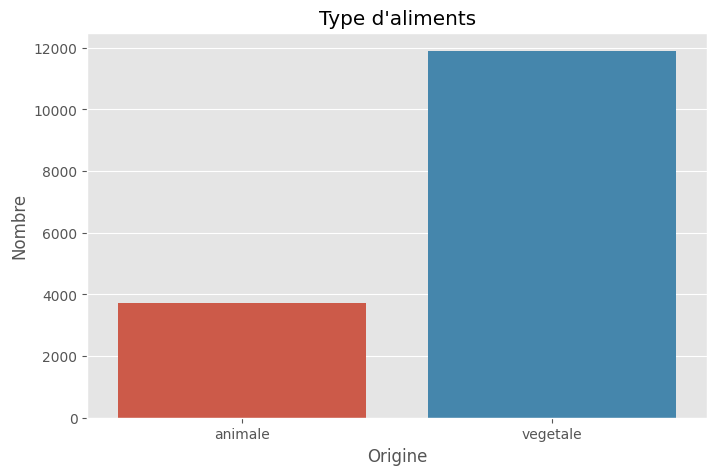

In [90]:
# visualisation des produits
#nb_pers_nourr_2017["Origine"].value_counts(normalize=True).plot.pie()
plt.figure(figsize=(8,5))
sns.countplot(x = nb_pers_nourr_2017["Origine"])
plt.xlabel("Origine")
plt.ylabel("Nombre")
plt.title("Type d'aliments")
plt.show()

In [91]:
# faire un filtrage pour garder seulement les lignes de produits vegetals
dispo_prod_veg = nb_pers_nourr_2017[nb_pers_nourr_2017["Origine"] == "vegetale"]
dispo_prod_veg.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbre habitant,Dispo_alim_pop (Kcal/jour/pop)
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,...,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0


In [92]:
# Disponibilité en calories
dispo_totale_veg_cal = round(sum(dispo_prod_veg["Dispo_alim_pop (Kcal/jour/pop)"])*365,2)
dispo_totale_veg_cal

6300178937197865.0

In [93]:
dispo_alim_veg = round(sum(dispo_prod_veg["Dispo_alim_pop (Kcal/jour/pop)"])/2500)
dispo_alim_veg 

6904305685

In [94]:
rapport_dispo_alim_veg = round((dispo_alim_veg/df_pop_2017)*100,2)
rapport_dispo_alim_veg

91.47

#### La disponibilité des produits végétaux pourraient nourrir 6 904 305 685 de personnes en 2017, soit 91,47% de la population mondiale.

### 4.4 Calcul des proportions

* L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

In [95]:
# La disponibilité intérieure(en tonne)
# .sort_values(by='Pertes',ascending=False)
#dispo_int = round(nb_pers_nourr_2017.loc[:, ["Aliments pour animaux", "Nourriture","Pertes","Semences", "Traitement", "Autres Utilisations"]].sum()/1000000)
dispo_int = round(nb_pers_nourr_2017.loc[:, ["Aliments pour animaux", "Nourriture","Pertes", "Semences", "Traitement", "Autres Utilisations"]].sum()/1000000)
dispo_int

Aliments pour animaux    1304245.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
Autres Utilisations       865023.0
dtype: float64

In [96]:
# convertir en dataframe
df_dispo_int = pd.DataFrame([dispo_int], index = ["Total(en tonne)"])
df_dispo_int

,Aliments pour animaux,Nourriture,Pertes,Semences,Traitement,Autres Utilisations
Total(en tonne),1304245.0,4876258.0,453698.0,154681.0,2204687.0,865023.0


In [97]:
# Les proportions
proportion = round((dispo_int/sum(nb_pers_nourr_2017["Disponibilité intérieure"]/1000000)*100),2)
proportion

Aliments pour animaux    13.24
Nourriture               49.51
Pertes                    4.61
Semences                  1.57
Traitement               22.38
Autres Utilisations       8.78
dtype: float64

In [98]:
# convertir en dataframe
df_proportion = pd.DataFrame([proportion], index = ["Proportion(en %)"])
df_proportion 

,Aliments pour animaux,Nourriture,Pertes,Semences,Traitement,Autres Utilisations
Proportion(en %),13.24,49.51,4.61,1.57,22.38,8.78


In [99]:
# Concaténer les deux dataframes 
df_disp_prop_2017 = pd.concat([df_dispo_int,df_proportion]).T.sort_values(by="Proportion(en %)",ascending=False)
df_disp_prop_2017

,Total(en tonne),Proportion(en %)
Nourriture,4876258.0,49.51
Traitement,2204687.0,22.38
Aliments pour animaux,1304245.0,13.24
Autres Utilisations,865023.0,8.78
Pertes,453698.0,4.61
Semences,154681.0,1.57


In [100]:
"""plt.figure(figsize = (12,5))
labels = ["Aliments pour animaux", "Nourriture","Pertes", "Semences", "Traitement", "Autres Utilisations"]
df_disp_prop_2017["Proportion(en %)"].plot.pie(labels = labels, colors = ["c", "g", "y", "m","r", "b"], autopct = "%1.2f%%")
plt.title("Disponibilité intérieure en 2017")
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
#plt.tight_layout()
plt.show()"""

'plt.figure(figsize = (12,5))\nlabels = ["Aliments pour animaux", "Nourriture","Pertes", "Semences", "Traitement", "Autres Utilisations"]\ndf_disp_prop_2017["Proportion(en %)"].plot.pie(labels = labels, colors = ["c", "g", "y", "m","r", "b"], autopct = "%1.2f%%")\nplt.title("Disponibilité intérieure en 2017")\nplt.legend(bbox_to_anchor=(1, 0, 0.5, 1))\n#plt.tight_layout()\nplt.show()'

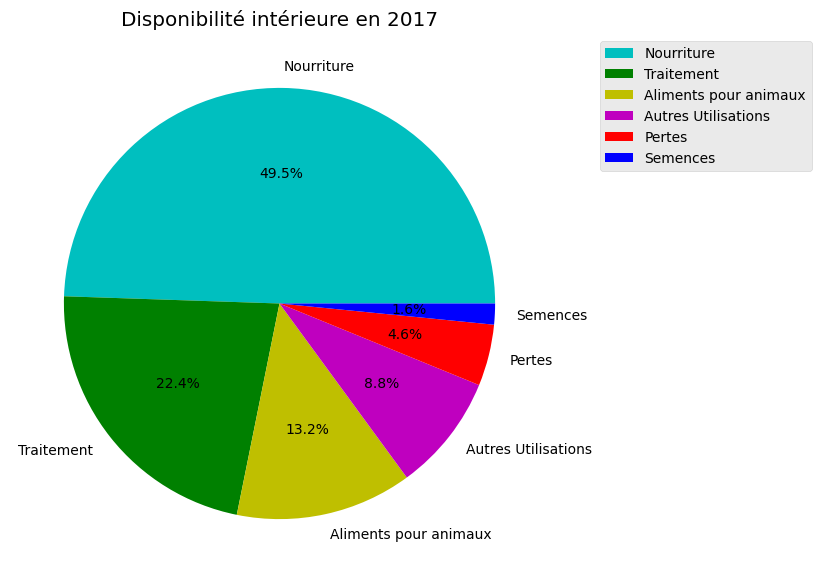

In [101]:
# visualisation des produits
plt.figure(figsize = (15,7))
plt.rcParams.update({ "font.size" : 10})
labels = ["Nourriture", "Traitement", "Aliments pour animaux", "Autres Utilisations", "Pertes", "Semences"]
plt.pie(df_disp_prop_2017["Proportion(en %)"], labels = labels, colors = ["c", "g", "y", "m","r", "b"],
        normalize = True,
        #explode = [0, 0, 0.2, 0],
        autopct = "%1.1f%%")
plt.title("Disponibilité intérieure en 2017")
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

# 5. Demandes de Mélanie

 ### 5.1 Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017;

* Nous allons à nouveau utiliser les deux DataFrames "Population" et "Sous_nutrition" qu'on avait faire la jointure pour trouver la proportion des personnes sous-alimentées

In [102]:
# afficher le dataframe
df_pop_snutri.head(5)

,Zone,Année,Nbre habitant,Personne en sous-alimentation
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [103]:
# Population mondiale en 2017
pop = round(sum(df_pop_snutri["Nbre habitant"]))
pop

7548134111

In [104]:
# Personnes en sous nutrition en 2017
sous_nutri = round(sum(df_pop_snutri["Personne en sous-alimentation"]))
sous_nutri

535700000

In [105]:
# Proportion des personnes en sous nutrition par rapport à la population mondiale en 2017
prop = round((sous_nutri/pop)*100,2)
prop

7.1

* On avait dèjà trouvé la population mondiale pour l'année 2017 ainsi que le nombre de personnes en sous nutrition pour cette même année.
* Nous allons créer une nouvelle colonne qu'on va nommer "Proportion" pour calculer la proportion de personnes en sous alimentés pour chaque pays.

In [106]:
# fonction groupby
#f_prop = df_pop_snutri.groupby(["Zone"])["Nbre habitant","Personne en sous-alimentation"].sum().sort_values(by="Personne en sous-alimentation",ascending=False).reset_index()
#f_prop.head(5)

In [107]:
# proportion des personnes en sous-alimentation
df_pop_snutri["Proportion (en %)"] =  round((df_pop_snutri["Personne en sous-alimentation"]/df_pop_snutri["Nbre habitant"])*100,2)
df_pop_snutri["Proportion (en %)"]

0      28.93
1       5.44
2       3.47
3       3.14
4       0.00
       ...  
231    27.21
232     6.87
233     0.00
234     0.00
235     0.00
Name: Proportion (en %), Length: 236, dtype: float64

* Après avoir fait calculer cette proportion, nous allons afficher les résultats par ordre décroissant.

In [108]:
# # proportion des personnes en sous-alimentation 
f_prop = df_pop_snutri[["Zone","Proportion (en %)"]].sort_values(by="Proportion (en %)",ascending=False)
f_prop.head(10)

,Zone,Proportion (en %)
87,Haïti,48.26
181,République populaire démocratique de Corée,47.19
128,Madagascar,41.06
122,Libéria,38.28
119,Lesotho,38.25
216,Tchad,37.96
186,Rwanda,35.06
145,Mozambique,32.81
219,Timor-Leste,32.17
0,Afghanistan,28.93


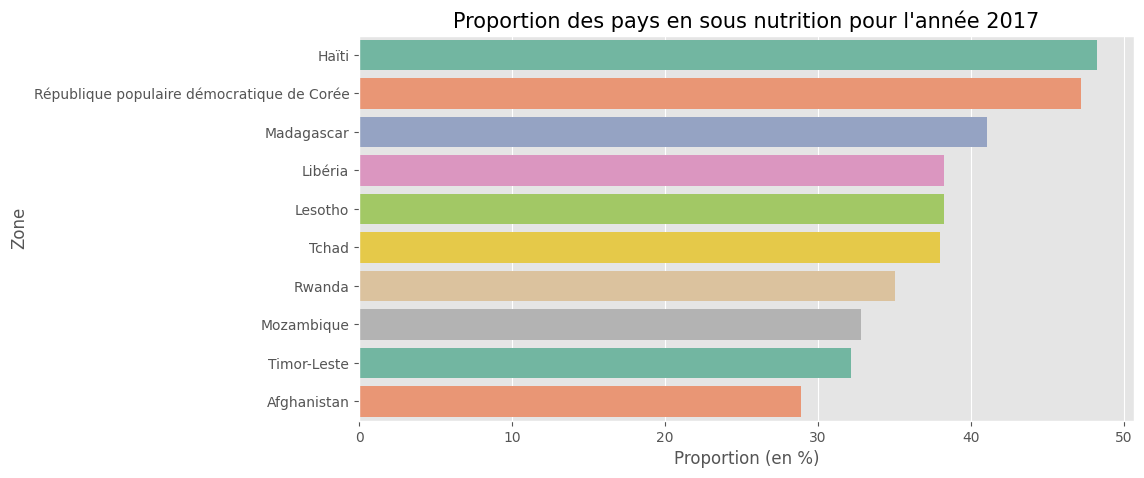

In [109]:
# Visualisation
plt.figure(figsize=(10, 5))
A = f_prop[f_prop["Proportion (en %)"] >= 28.93]
sns.barplot(x = A["Proportion (en %)"], y = A["Zone"], data = A, palette="Set2")
plt.title("Proportion des pays en sous nutrition pour l'année 2017", fontsize = "15") 
plt.show()

### 5.2 la proportion de personnes sous-alimentées des pays qui ont le plus bénéficié d’aide depuis 2013;

* Nous allons nous interesser au dataframe  "aide-alimentaire".
* Pour celà nous allons seulement les lignes où l'année est supérieure ou égale à 2013

In [110]:
# dataframe aide alimentaire
data_aide.head(5)

,Zone,Année,Produit,Quantité aide alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [111]:
# Créer un mask
df_aide_2013 = data_aide[data_aide["Année"] >= 2013]
df_aide_2013.head(5)

,Zone,Année,Produit,Quantité aide alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


* Nous allons utiliser la fonction groupby pour calculer la somme de la quantité d'aide alimentaire par pays

In [112]:
# fonction groupby
f_prop_aide = df_aide_2013.groupby(["Zone"])["Quantité aide alimentaire"].sum().sort_values(ascending=False).reset_index()
f_prop_aide.head(10)

,Zone,Quantité aide alimentaire
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000
5,Kenya,552836000
6,Bangladesh,348188000
7,Somalie,292678000
8,République démocratique du Congo,288502000
9,Niger,276344000


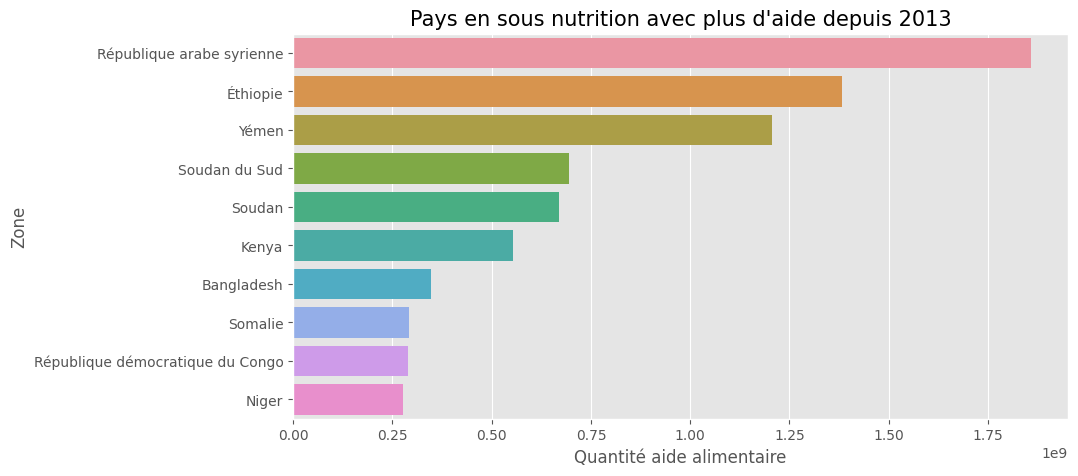

In [113]:
# Visualisation
plt.figure(figsize=(10, 5))
B = f_prop_aide[f_prop_aide["Quantité aide alimentaire"] >= 276344000]
sns.barplot(x = B["Quantité aide alimentaire"], y = B["Zone"], data = B)
plt.title("Pays en sous nutrition avec plus d'aide depuis 2013", fontsize = "15")
plt.show()

### 5.3 Les pays ayant le plus de disponibilité/habitant

* Nous allons utiliser le dataframe du nombre de personnes qui pourraient être nourries en 2017 c'est à dire celle obtenu après jointure de la "disponibilité alimentaire" et "population".

In [114]:
nb_pers_nourr_2017.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbre habitant,Dispo_alim_pop (Kcal/jour/pop)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0


In [115]:
# Pays avec le plus de disponibité alimentaire
plus_dispo = nb_pers_nourr_2017.groupby(["Zone"])["Disponibilité alimentaire (Kcal/personne/jour)"].sum().sort_values(ascending=False).reset_index()
plus_dispo.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
5,Irlande,3602.0
6,Italie,3578.0
7,Luxembourg,3540.0
8,Égypte,3518.0
9,Allemagne,3503.0


In [116]:
plus_dispo.shape

(174, 2)

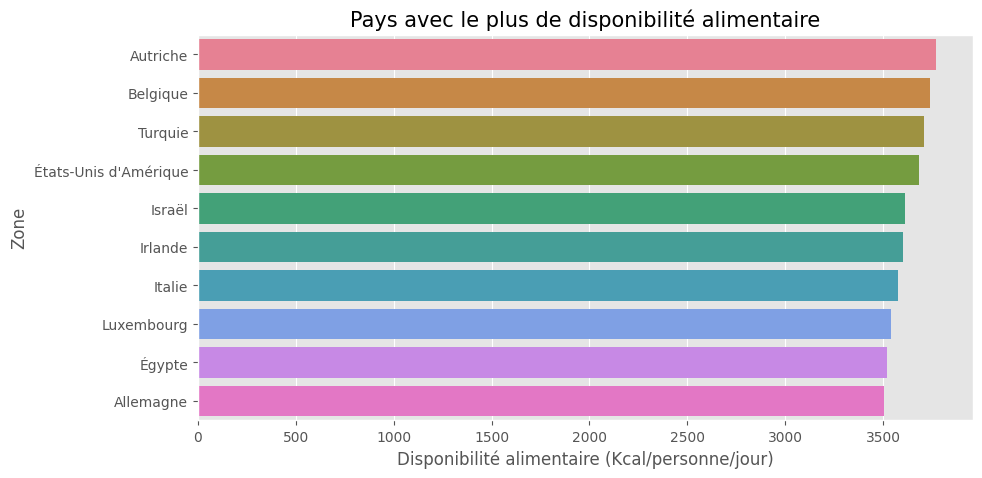

In [117]:
# Visualisation
plt.figure(figsize=(10, 5))
C = plus_dispo[plus_dispo["Disponibilité alimentaire (Kcal/personne/jour)"] >= 3503]
sns.barplot(x = C["Disponibilité alimentaire (Kcal/personne/jour)"], y = C["Zone"], data = B, palette = "husl")
plt.title("Pays avec le plus de disponibilité alimentaire", fontsize = "15")
plt.show()

### 5.3 Les pays ayant le moins de disponibilité/habitant

In [118]:
# Pays avec le plus de disponibité alimentaire
moins_dispo = nb_pers_nourr_2017.groupby(["Zone"])["Disponibilité alimentaire (Kcal/personne/jour)"].sum().sort_values(ascending=True).reset_index()
moins_dispo.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


In [119]:
moins_dispo.shape

(174, 2)

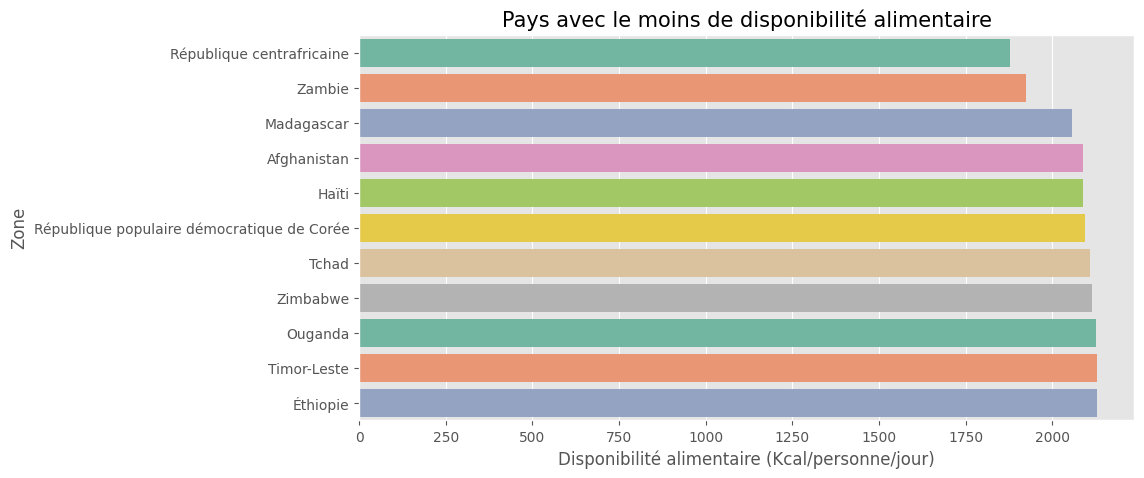

In [120]:
# Visualisation
plt.figure(figsize=(10, 5))
D = moins_dispo[moins_dispo["Disponibilité alimentaire (Kcal/personne/jour)"] <= 2129]
sns.barplot(x = D["Disponibilité alimentaire (Kcal/personne/jour)"], y = D["Zone"], data = B, palette = "Set2")
plt.title("Pays avec le moins de disponibilité alimentaire", fontsize = "15")
plt.show()

* On pourrait aussi approfondir nos recherches avec plus de visualisations par rapport à l'évolution des disponibilités alimentaires par année et par pays.
* L'évolution de la population et des personnes en sous nutritions par années.

In [121]:
# Dataframe population
pop = data_population.groupby(["Année"])[["Nbre habitant"]].sum().reset_index()
pop

,Année,Nbre habitant
0,2013,7.210846e+09
1,2014,7.295558e+09
2,2015,7.380067e+09
3,2016,7.464295e+09
4,2017,7.548134e+09
5,2018,7.631369e+09


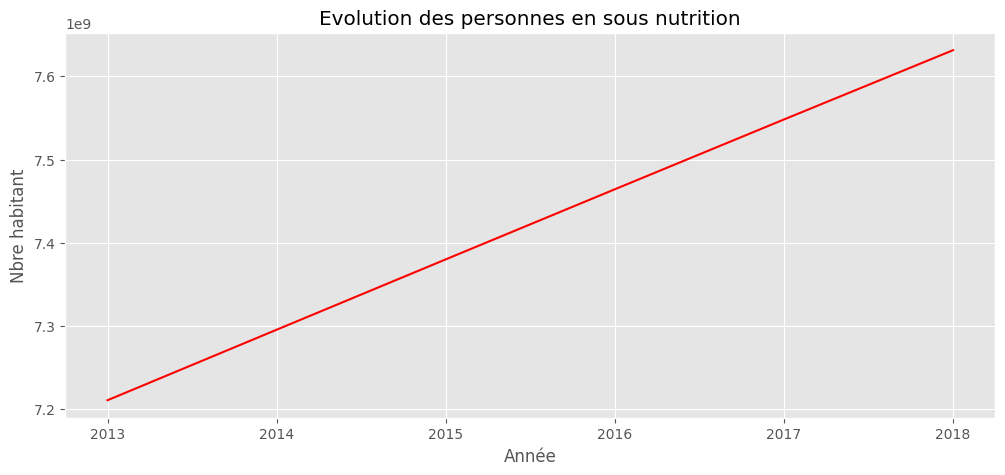

In [122]:
# Visualisation
x = pop["Année"]
y = pop["Nbre habitant"]
plt.figure(figsize=(12,5))
plt.plot(x, y, color = "r")
plt.xlabel("Année")
plt.ylabel("Nbre habitant")
plt.title("Evolution des personnes en sous nutrition")
plt.show()

In [123]:
# Dataframe sous nutrition
snutri = data_sous_nutrition.groupby(["Année"])[["Personne en sous-alimentation"]].sum().reset_index()
snutri

,Année,Personne en sous-alimentation
0,2013,528100000.0
1,2014,523500000.0
2,2015,524700000.0
3,2016,528600000.0
4,2017,535700000.0
5,2018,544200000.0


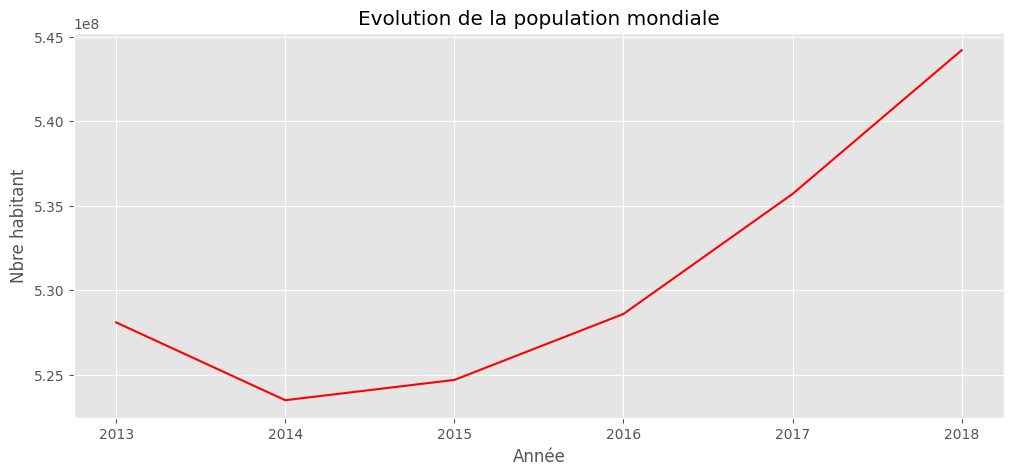

In [124]:
# Visualisation
x = snutri["Année"]
y = snutri["Personne en sous-alimentation"]
plt.figure(figsize=(12,5))
plt.plot(x, y, color = "r")
plt.xlabel("Année")
plt.ylabel("Nbre habitant")
plt.title("Evolution de la population mondiale")
plt.show()

In [125]:
nb_pers_nourr_2017.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbre habitant,Dispo_alim_pop (Kcal/jour/pop)
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,...,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113.0,145184452.0


In [126]:
# Pays avec le plus de disponibité alimentaire
plus_dispo = nb_pers_nourr_2017.groupby(["Zone"])["Disponibilité alimentaire (Kcal/personne/jour)","Nourriture","Aliments pour animaux",
                                        "Pertes","Production","Semences" ].sum().sort_values(by ="Disponibilité alimentaire (Kcal/personne/jour)",	
                                        ascending=False).reset_index()
plus_dispo.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Nourriture,Aliments pour animaux,Pertes,Production,Semences
0,Autriche,3770.0,9.085000e+09,3.412000e+09,4.590000e+08,1.812900e+10,1.730000e+08
1,Belgique,3737.0,1.113400e+10,5.533000e+09,5.640000e+08,2.449600e+10,1.530000e+08
2,Turquie,3708.0,7.255100e+10,1.775000e+10,1.203600e+10,1.374320e+11,2.553000e+09
3,États-Unis d'Amérique,3682.0,3.208890e+11,1.484320e+11,7.162000e+09,8.946680e+11,1.040300e+10
4,Israël,3610.0,7.132000e+09,2.525000e+09,2.200000e+08,6.906000e+09,7.100000e+07
5,Irlande,3602.0,5.320000e+09,3.758000e+09,2.360000e+08,1.150100e+10,8.900000e+07
6,Italie,3578.0,6.058400e+10,1.614400e+10,1.861000e+09,8.085500e+10,7.360000e+08
7,Luxembourg,3540.0,6.070000e+08,1.470000e+08,1.100000e+07,5.930000e+08,9.000000e+06
8,Égypte,3518.0,6.595700e+10,1.508400e+10,7.608000e+09,9.584800e+10,1.365000e+09
9,Allemagne,3503.0,7.923800e+10,3.020900e+10,3.781000e+09,1.545470e+11,1.551000e+09


In [127]:
# creer un mask
plus_dispo = plus_dispo[plus_dispo["Disponibilité alimentaire (Kcal/personne/jour)"] >= 3482]

In [128]:
# création d'une nouvelle colonne
plus_dispo["Type"] = "Pays avec le plus de disponibilité"
plus_dispo.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Nourriture,Aliments pour animaux,Pertes,Production,Semences,Type
0,Autriche,3770.0,9.085000e+09,3.412000e+09,4.590000e+08,1.812900e+10,1.730000e+08,Pays avec le plus de disponibilité
1,Belgique,3737.0,1.113400e+10,5.533000e+09,5.640000e+08,2.449600e+10,1.530000e+08,Pays avec le plus de disponibilité
2,Turquie,3708.0,7.255100e+10,1.775000e+10,1.203600e+10,1.374320e+11,2.553000e+09,Pays avec le plus de disponibilité
3,États-Unis d'Amérique,3682.0,3.208890e+11,1.484320e+11,7.162000e+09,8.946680e+11,1.040300e+10,Pays avec le plus de disponibilité
4,Israël,3610.0,7.132000e+09,2.525000e+09,2.200000e+08,6.906000e+09,7.100000e+07,Pays avec le plus de disponibilité


In [129]:
# suppression des colonnes
plus_dispo = plus_dispo.drop(columns = ["Zone",	"Disponibilité alimentaire (Kcal/personne/jour)"])

In [130]:
# Pays avec le plus de disponibité alimentaire
moins_dispo = nb_pers_nourr_2017.groupby(["Zone"])["Disponibilité alimentaire (Kcal/personne/jour)","Nourriture","Aliments pour animaux",
                                        "Pertes","Production","Semences" ].sum().sort_values(by ="Disponibilité alimentaire (Kcal/personne/jour)",	
                                        ascending=True).reset_index()
moins_dispo.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Nourriture,Aliments pour animaux,Pertes,Production,Semences
0,République centrafricaine,1879.0,2.092000e+09,1000000.0,1.220000e+08,2.503000e+09,63000000.0
1,Zambie,1924.0,5.088000e+09,408000000.0,2.420000e+08,1.052600e+10,76000000.0
2,Madagascar,2056.0,9.741000e+09,842000000.0,9.660000e+08,1.416000e+10,375000000.0
3,Afghanistan,2087.0,1.073500e+10,768000000.0,1.135000e+09,1.117100e+10,395000000.0
4,Haïti,2089.0,4.101000e+09,481000000.0,6.790000e+08,5.072000e+09,36000000.0
5,République populaire démocratique de Corée,2093.0,1.142500e+10,816000000.0,1.066000e+09,1.388300e+10,194000000.0
6,Tchad,2109.0,4.097000e+09,104000000.0,4.590000e+08,5.153000e+09,101000000.0
7,Zimbabwe,2113.0,4.762000e+09,131000000.0,1.880000e+08,7.914000e+09,76000000.0
8,Ouganda,2126.0,2.012100e+10,348000000.0,9.910000e+08,2.632100e+10,154000000.0
9,Timor-Leste,2129.0,4.190000e+08,9000000.0,1.400000e+07,3.710000e+08,2000000.0


In [131]:
# creer un mask
moins_dispo = moins_dispo[moins_dispo["Disponibilité alimentaire (Kcal/personne/jour)"] <= 2205]

In [132]:
# création d'une nouvelle colonne
moins_dispo["Type"] = "Pays avec le moins de disponibilité"
moins_dispo.head(5)

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Nourriture,Aliments pour animaux,Pertes,Production,Semences,Type
0,République centrafricaine,1879.0,2.092000e+09,1000000.0,1.220000e+08,2.503000e+09,63000000.0,Pays avec le moins de disponibilité
1,Zambie,1924.0,5.088000e+09,408000000.0,2.420000e+08,1.052600e+10,76000000.0,Pays avec le moins de disponibilité
2,Madagascar,2056.0,9.741000e+09,842000000.0,9.660000e+08,1.416000e+10,375000000.0,Pays avec le moins de disponibilité
3,Afghanistan,2087.0,1.073500e+10,768000000.0,1.135000e+09,1.117100e+10,395000000.0,Pays avec le moins de disponibilité
4,Haïti,2089.0,4.101000e+09,481000000.0,6.790000e+08,5.072000e+09,36000000.0,Pays avec le moins de disponibilité


In [133]:
# suppression des colonnes
moins_dispo = moins_dispo.drop(columns = ["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"])

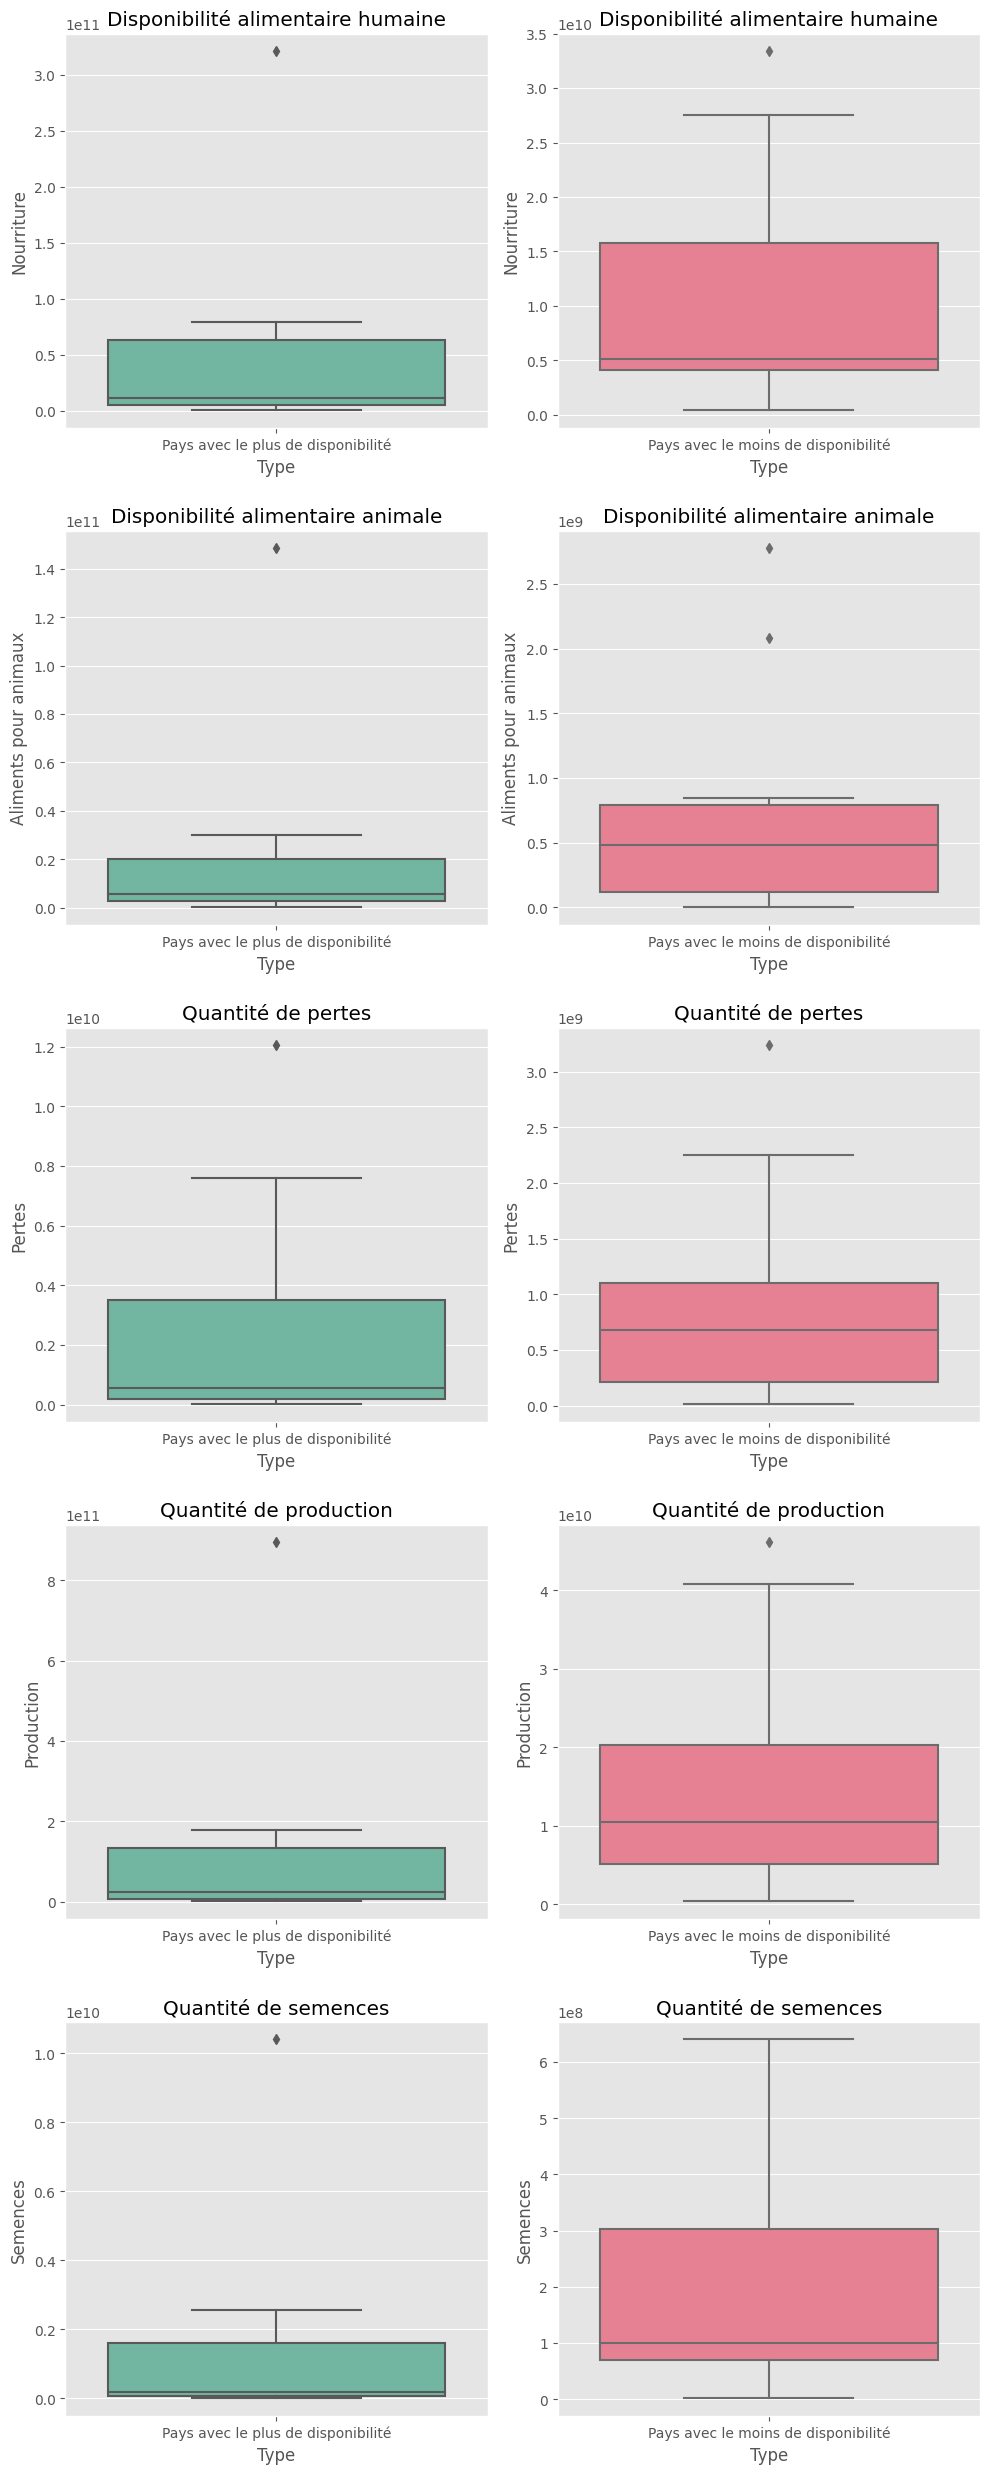

In [134]:
#     Le nombre d'ordinateurs
plt.figure(figsize=(10,25))
plt.subplot(5,2,1)
sns.boxplot(x = "Type", y = 'Nourriture', data = plus_dispo, palette = "Set2" )
plt.title("Disponibilité alimentaire humaine")

plt.subplot(5,2,2)
sns.boxplot(x = "Type", y = 'Nourriture', data = moins_dispo, palette = "husl" )
plt.title("Disponibilité alimentaire humaine")

plt.subplot(5,2,3)
sns.boxplot(x = "Type", y = 'Aliments pour animaux', data = plus_dispo, palette = "Set2" )
plt.title("Disponibilité alimentaire animale")

plt.subplot(5,2,4)
sns.boxplot(x = "Type", y = 'Aliments pour animaux', data = moins_dispo, palette = "husl" )
plt.title("Disponibilité alimentaire animale")

plt.subplot(5,2,5)
sns.boxplot(x = "Type", y = 'Pertes', data = plus_dispo, palette = "Set2" )
plt.title("Quantité de pertes")

plt.subplot(5,2,6)
sns.boxplot(x = "Type", y = 'Pertes', data = moins_dispo, palette = "husl" )
plt.title("Quantité de pertes")

plt.subplot(5,2,7)
sns.boxplot(x = "Type", y = 'Production', data = plus_dispo, palette = "Set2" )
plt.title("Quantité de production")

plt.subplot(5,2,8)
sns.boxplot(x = "Type", y = 'Production', data = moins_dispo, palette = "husl" )
plt.title("Quantité de production")

plt.subplot(5,2,9)
sns.boxplot(x = "Type", y = 'Semences', data = plus_dispo, palette = "Set2" )
plt.title("Quantité de semences")

plt.subplot(5,2,10)
sns.boxplot(x = "Type", y = 'Semences', data = moins_dispo, palette = "husl" )
plt.title("Quantité de semences")


#plt.show()
plt.tight_layout()

* Evolution de la disponibilité alimentaire par année et par pays avec graphique linéaire ou même l'evolution de la population par année, évolution des personnes en sous nutrition

# 6. Demandes de Julien

### 6.1 L’utilisation des céréales

* notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation
  pour animaux. 
* La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet
  Bilans alimentaires,

In [135]:
# liste des produits en 2017
data_dispo["Produit"].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [136]:
# dataset télécharger dans le site de FAO
data_2013 = pd.read_csv(r"C:\Users\diarr\Downloads\DAN-P4-FAO\CODEPRODUITS.csv",  sep=',', encoding='latin-1')
data_2013.head(5)

,Code Produit,Code CPC,Produit
0,2501,'S2501,Population
1,2511,'S2511,Blé et produits
2,2513,'S2513,Orge et produits
3,2514,'S2514,Maïs et produits
4,2515,'S2515,Seigle et produits


In [137]:
# liste des produits en 2013
data_2013["Produit"].unique()

array(['Population', 'Blé et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales; Autres',
       'Pommes de Terre et produits', 'Manioc et produits',
       'Patates douces', 'Racines nda', 'Ignames', 'Sucre; canne',
       'Sucre; betterave', 'Sucre non centrifugé', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Palmistes', 'Olives', 'Plantes Oleiferes; Autre',
       'Huile de Soja', "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil P

* Nous allons dans le site de la FAO pour charger directement la liste des céréales pour l'année 2013 parceque dans la colonne produit qu'on a , il y'a une différence des produits de types céréales.

In [138]:
# creer une liste à partir de la liste de produits de 2013
liste_cereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

* Ensuite nous allons utiliser une fonction de python "isin" pour comparer la liste des céréales crées en dessus pour vérifier celles qui sont présentes en 2017.

In [139]:
# création du dataframe à partir de la liste créer au dessus
data_cereales = data_dispo.loc[data_dispo['Produit'].isin(liste_cereales),:] 
data_cereales.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,Afrique du Sud,Avoine,vegetale,8000000.0,0.0,5.0,0.75,0.09,0.16,49000000.0,4000000.0,25000000.0,40000000.0,1000000.0,28000000.0,1000000.0,0.0,0.0
81,Afrique du Sud,"Céréales, Autres",vegetale,8000000.0,0.0,1.0,0.07,0.00,0.02,12000000.0,10000000.0,3000000.0,4000000.0,0.0,19000000.0,0.0,0.0,0.0
162,Albanie,Avoine,vegetale,25000000.0,0.0,1.0,0.13,0.01,0.03,28000000.0,0.0,1000000.0,0.0,1000000.0,27000000.0,1000000.0,0.0,0.0
176,Albanie,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.08,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
# création du dataframe à partir de la liste créer au dessus
#data_cereales = nb_pers_nourr_2017.loc[nb_pers_nourr_2017['Produit'].isin(liste_cereales),:] 
#data_cereales.head(5)

In [141]:
data_cereales["Produit"].unique()

array(['Céréales, Autres', 'Avoine'], dtype=object)

In [142]:
# Disponibilité intérieur pour l'année 2013
dispo_int_2013 = round(data_cereales.loc[:, ["Aliments pour animaux", "Nourriture","Pertes", "Semences", "Traitement", "Autres Utilisations"]].sum()/1000000)
dispo_int_2013

Aliments pour animaux    35286.0
Nourriture                9227.0
Pertes                    1299.0
Semences                  3688.0
Traitement                 196.0
Autres Utilisations       1594.0
dtype: float64

In [143]:
# Les proportions
#proportion_2013 = round((data_cereales.loc[:, ["Aliments pour animaux", "Nourriture","Pertes", "Semences", "Traitement", "Autres Utilisations"]].sum()/1000000/sum(data_cereales["Disponibilité intérieure"]/1000000)*100),2)
#proportion_2013

In [144]:
# Les proportions
proportion_2013 = round((dispo_int_2013/(sum(data_cereales["Disponibilité intérieure"]/1000000))*100),2)
proportion_2013

Aliments pour animaux    69.34
Nourriture               18.13
Pertes                    2.55
Semences                  7.25
Traitement                0.39
Autres Utilisations       3.13
dtype: float64

In [145]:
# convertir en dataframe
dispo_int_2013 = pd.DataFrame([dispo_int_2013], index = ["Totale(en tonne)"])
dispo_int_2013 

,Aliments pour animaux,Nourriture,Pertes,Semences,Traitement,Autres Utilisations
Totale(en tonne),35286.0,9227.0,1299.0,3688.0,196.0,1594.0


In [146]:
# convertir en dataframe
df_proportion_2013 = pd.DataFrame([proportion_2013], index = ["Proportion(en %)"])
df_proportion_2013

,Aliments pour animaux,Nourriture,Pertes,Semences,Traitement,Autres Utilisations
Proportion(en %),69.34,18.13,2.55,7.25,0.39,3.13


In [147]:
# Concaténer les deux dataframes 
df_disp_prop_2013 = pd.concat([dispo_int_2013,df_proportion_2013]).T.sort_values(by = "Proportion(en %)", ascending = False)
df_disp_prop_2013

,Totale(en tonne),Proportion(en %)
Aliments pour animaux,35286.0,69.34
Nourriture,9227.0,18.13
Semences,3688.0,7.25
Autres Utilisations,1594.0,3.13
Pertes,1299.0,2.55
Traitement,196.0,0.39


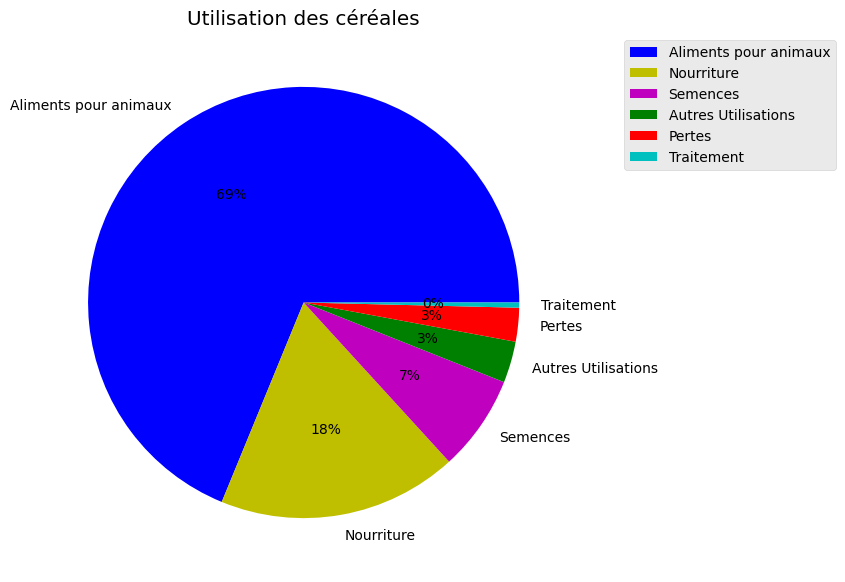

In [148]:
# visualisation des produits
plt.figure(figsize = (15,7))
labels = ["Aliments pour animaux", "Nourriture", "Semences", "Autres Utilisations", "Pertes", "Traitement"]
plt.pie(df_disp_prop_2013["Proportion(en %)"], labels = labels, colors = ["b", "y", "m", "g","r", "c"],
        normalize = True,
        #explode = [0, 0, 0.2, 0],
        autopct = "%1.0f%%")
plt.title("Utilisation des céréales")
plt.legend(bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [149]:
thai = df_pop_snutri.loc[df_pop_snutri['Zone'] == 'Thaïlande',["Zone",	"Nbre habitant", "Personne en sous-alimentation", "Proportion (en %)"]]
thai.head(5)

,Zone,Nbre habitant,Personne en sous-alimentation,Proportion (en %)
218,Thaïlande,69209810.0,6200000.0,8.96


### 6.2 L'utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

* Nous allons utiliser le dataframe de la disponibilité alimentaire.

In [150]:
# Creer un mask
df_dispo_thai = data_dispo[(data_dispo["Zone"] == 'Thaïlande') & (data_dispo["Produit"] == 'Manioc') ]
df_dispo_thai.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [151]:
# vérifier la plus grande valeur de l'exportation
df_dispo_thai["max_exp"] = nb_pers_nourr_2017["Exportations - Quantité"].max()
df_dispo_thai["max_exp"]

13809    4.279700e+10
Name: max_exp, dtype: float64

In [152]:
# vérifier la plus grande valeur de production
df_dispo_thai["max_prod"] = nb_pers_nourr_2017["Production"].max()
df_dispo_thai["max_prod"]

13809    7.392670e+11
Name: max_prod, dtype: float64

* Avec la fonction "max()" de python , on vient de voir que la Thailande fait parti des plus grands producteurs et exportateurs de manioc dans le monde.
* Nous avons aussi le dataframe des personnes en sous nutrition pour chaque pays, pour connaitre la proportion de nombre de personne en sous nutrition par rapport à la population de Thaïlande.

In [153]:
df_pop_snutri.head(5)

,Zone,Année,Nbre habitant,Personne en sous-alimentation,Proportion (en %)
0,Afghanistan,2017,36296113.0,10500000.0,28.93
1,Afrique du Sud,2017,57009756.0,3100000.0,5.44
2,Albanie,2017,2884169.0,100000.0,3.47
3,Algérie,2017,41389189.0,1300000.0,3.14
4,Allemagne,2017,82658409.0,0.0,0.00


In [154]:
# Creer un mask
pop_snutri_thai = df_pop_snutri[df_pop_snutri["Zone"] == "Thaïlande"]
pop_snutri_thai

,Zone,Année,Nbre habitant,Personne en sous-alimentation,Proportion (en %)
218,Thaïlande,2017,69209810.0,6200000.0,8.96


* Maintenant nous allons faire le rapport entre la production et l'exportation du manioc en Thaïlande.

In [155]:
# somme de la production
r_prod = round(sum(df_dispo_thai["Production"]))
r_prod

30228000000

In [156]:
# somme de l'exportation
r_exp = round(sum(df_dispo_thai["Exportations - Quantité"]))
r_exp

25214000000

In [157]:
# rapport entre la production et l'exportation
r_prod_exp = round((r_prod/r_exp)*100,2)
r_prod_exp

119.89

In [158]:
# rapport entre la production et l'exportation
r_exp_prod = round((r_exp/r_prod)*100,2)
r_exp_prod

83.41

#### La quantité de production est 119 fois à l'exportation de la quantité de manioc. Celà confirme que la Thaïlande en est le premier exportateur et producteur mondial de manioc qu'il ne peut tout exporter.

#### Cette augmentation est due à la demande croissante en alimentation animale dans les fermes laitières de Nouvelle-Zélande.

* Ce pendant cette grande quantité de manioc produite ne peut pas seulement éviter la sous nutrition parceque on ne peut pas se nourrir seulement du manioc, en plus L'économie de la Thaïlande est selon le FMI une économie de pays émergent, fortement dépendante de ses exportations qui représentent plus de la moitié du PIB, qui est en 2015,

https://fr.wikipedia.org/wiki/%C3%89conomie_de_la_Tha%C3%AFlande

https://www.golden-trade.com/cnt/gt/manioc-3225-a.html#:~:text=La%20Tha%C3%AFlande%2C%20avec%2018%20millions,aux%20industries%20alimentaires%20non%20alimentaires

https://www.chine-magazine.com/la-thailande-exporte-son-manioc-vers-la-chine/.

* Cette augmentation est due à la demande croissante en alimentation animale dans les fermes laitières de Nouvelle-Zélande. 80 % des exportations sont constituées de  pulpe de manioc sèche.

* La Thaïlande, avec 18 millions de tonnes par an est le premier producteur mondial de manioc. Près de 50% de sa production annuelle de racines de manioc est utlisé pour extraire 2 millions de tonnes d'amidon. Le reste sert aux industries alimentaires non alimentaires

### Vérifier en Afrique avec le Nigéria qui est un grand producteur de Manioc

In [159]:
# Creer un mask
df_dispo_nig = data_dispo[(data_dispo["Zone"] == 'Nigéria') & (data_dispo["Produit"] == 'Manioc') ]
df_dispo_nig.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
9830,Nigéria,Manioc,vegetale,2.628800e+10,0.0,262.0,118.86,0.58,1.22,5.300400e+10,11000000.0,15000000.0,2.063600e+10,6.080000e+09,5.300000e+10,0.0,0.0,0.0


In [160]:
raport = (sum(df_dispo_nig["Production"])/(sum(df_dispo_nig["Exportations - Quantité"])))*100
raport 

481818.1818181818